In [1]:
import sys
sys.path.append('./tree-parser')

import tree as tr
import tree_parser as tp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import csv

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
filename_train = "train_bert.tsv"
filename_dev = "dev_bert.tsv"
filename_test = "test_bert.tsv"

In [3]:
# This will have to be changed to parse the csv properly

max_phrase_length = 30

def get_labels_and_data(csvfile):
    labels = []
    sentences = []
    with open(csvfile, mode ='r') as file: 
        file_to_read = csv.reader(file) 
        for line in file_to_read:
            #print(line)
            labels.append(line[0])
            sentences.append(line[1])
            
    return labels, sentences

In [4]:
train_size = 3000
valid_size = 200
test_size = 3000

labels_train, sentences_train = get_labels_and_data("tree-parser/full_sentences/train.csv")
labels_dev, sentences_dev = get_labels_and_data("tree-parser/full_sentences/dev.csv")
labels_test, sentences_test = get_labels_and_data("tree-parser/full_sentences/test.csv")

labels_train, sentences_train = labels_train[:train_size], sentences_train[:train_size]
labels_dev, sentences_dev = labels_dev[:valid_size], sentences_dev[:valid_size]
labels_test, sentences_test = labels_test[:test_size], sentences_test[:test_size]

print(len(sentences_train))
print(len(sentences_dev))
print(len(sentences_test))

df_bert_train = pd.DataFrame({
     'id': range(len(sentences_train)),
     'label': labels_train,
     'alpha': ['a']*len(labels_train), # This is needed by the bert model
     'text': sentences_train
})

df_bert_train.head()

3000
200
2210


,id,label,alpha,text
0,0,3,a,the rock is destined to be the 21st century 's...
1,1,4,a,the gorgeously elaborate continuation of `` th...
2,2,3,a,singer\/composer bryan adams contributes a sle...
3,3,2,a,you 'd think by now america would have had eno...
4,4,3,a,yet the act is still charming here .


In [5]:
df_bert_dev = pd.DataFrame({
    'id': range(len(sentences_dev)),
    'label': labels_dev,
    'alpha': ['a']*len(labels_dev),
    'text': sentences_dev
})

df_bert_dev.head()

,id,label,alpha,text
0,0,3,a,it 's a lovely film with lovely performances b...
1,1,2,a,no one goes unindicted here
2,2,3,a,and if you 're not nearly moved to tears by a ...
3,3,4,a,a warm
4,4,4,a,uses sharp humor and insight into human nature...


In [6]:
df_bert_test = pd.DataFrame({
     'id':range(len(sentences_test)),
     'text': sentences_test
})

df_bert_test.head()


,id,text
0,0,effective but too-tepid biopic
1,1,if you sometimes like to go to the movies to h...
2,2,emerges as something rare
3,3,the film provides some great insight into the ...
4,4,offers that rare combination of entertainment ...


In [7]:
df_bert_train.to_csv('bert/train.tsv', sep='\t', index=False, header=False)
df_bert_dev.to_csv('bert/dev.tsv', sep='\t', index=False, header=False)
df_bert_test.to_csv('bert/test.tsv', sep='\t', index=False, header=True)

[[  0   0   0 279   0]
 [  0   0   0 633   0]
 [  0   0   0 389   0]
 [  0   0   0 510   0]
 [  0   0   0 399   0]]
Accuracy 0.23076923076923078


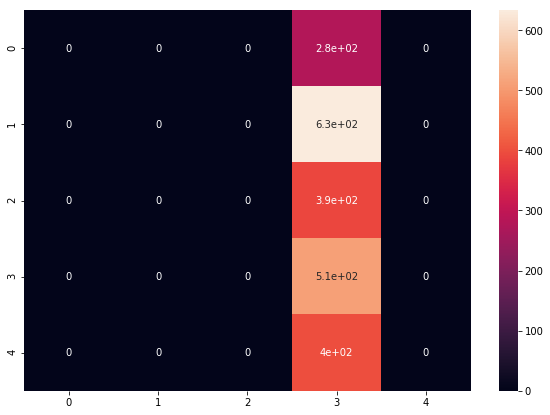

In [9]:
path_to_test_result = "../BERT/BERT/bert_output/test_results.tsv"

label_results=[]
pd.DataFrame()

with open(path_to_test_result) as file:
    result = csv.reader(file, delimiter="\t")
    for row in result:
        data =[float(i) for i in row]
        label_results.append(np.argmax(data))
        
df_results=pd.DataFrame()
df_results=pd.DataFrame(label_results)
df_results[0]

for i in range(0, len(labels_test)): 
    labels_test[i] = int(labels_test[i]) 

cm = confusion_matrix(labels_test, df_results[0])
df_cm = pd.DataFrame(cm, index = [i for i in "01234"],
                  columns = [i for i in "01234"])
print(cm)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

print("Accuracy",metrics.accuracy_score(labels_test[:test_size], df_results[0]))